In [395]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


import scipy.stats as stats
import math

def addGroups (dfToAdd, groupsEtu=groupsEtu):
    dfToAdd.index=dfToAdd.index.values.astype(str)
    if (len(dfToAdd.index.values)>0):
       assert(type(dfToAdd.index.values[0])==type(groupsEtu.index.values[0])), "indices are not of the same type:"+str(type(dfToAdd.index.values[0]))+str(type(groupsEtu.index.values[0])) 
    dfToAdd=pd.concat([groupsEtu, dfToAdd], axis=1, join='inner')
    #dfToAdd['groupeExpe']= groupsEtu['groupeExpe']
    return dfToAdd


def plotseriessubplot(data, mytitle,afilledcolumnname, fig, ax):
    #fig, ax = plt.subplots()
    #ax.xaxis_date()
    #ax.set_xticks(np.arange(0,300, step=30))
    ax.plot(data.groupby('date').count()[afilledcolumnname])   
    ax.set_title(mytitle)
    fig.autofmt_xdate()    
    #plt.show()
    

def plotseries(data, mytitle, afilledcolumnname):
    fig, ax = plt.subplots()
    plotseriessubplot(data, mytitle,afilledcolumnname, fig, ax)
    
#input: quiznotecounts= a dataframe with a column indicating the variable to plot in hist and a columnm indicating the experimental group to which it belongs    
def testsHeatmap(quiznotecounts, groupcolname="group", variablecolname="counts", mytest="kruskal"):
    #test= kruskal(non parametric equivalent of ANOVA. Tests the difference in medians) or ks_2samp(non-param, compar distributions) 
    dfTests=pd.DataFrame(columns=range(0,6), index=range(0,6))
    assert(mytest=="kruskal" or mytest=="ks_2samp"), "mytest value can only be \"kruskal\" or \"ks_2samp\" "
    for groupa in range (0,6):
        for groupb in range (0,groupa):
            if (mytest=="kruskal"):
                dfTests.loc[groupa, groupb]=stats.kruskal(quiznotecounts[quiznotecounts[groupcolname]==groupa][variablecolname],quiznotecounts[quiznotecounts[groupcolname]==groupb][variablecolname]).pvalue
            if(mytest=="ks_2samp"):
                print(quiznotecounts[quiznotecounts[groupcolname]==groupa][variablecolname])
                print(quiznotecounts[quiznotecounts[groupcolname]==groupb][variablecolname])
                res=stats.ks_2samp(quiznotecounts[quiznotecounts[groupcolname]==groupa][variablecolname],quiznotecounts[quiznotecounts[groupcolname]==groupb][variablecolname]).pvalue
                dfTests.loc[groupa, groupb]=res
                        
    dfTests = dfTests.astype(float)
    return sns.heatmap(dfTests, annot=True) 

def createcolorlist(length):
    colors=[]
    for i in range (length):
        colors.append(plt.cm.Set1(i/length))
    return colors
 

In [362]:
#column names of the original moodle logs
columnNames=["LineLogID","role","action","target", "table", "actionIDinTable", "actName", "context", "other", "dateTime"]
# Set the default color cycle

#students with groups
groupsEtu=pd.read_csv("/Users/iryna/data_MOCAH/data_SPOC2019/intermedFiles/groupsEtuAutoris.csv", index_col=0)
groupsEtu.index=groupsEtu.index.values.astype(str)


#quizzes general
log=pd.read_csv("/Users/iryna/projetFadil/nuagefadil/log_moodle_file_with_pointer.csv", sep=",")
log['date']=pd.to_datetime(log['date'])
log['dateonly']=log['date'].apply(lambda x:x.date())
log['week']=log['dateonly'].apply(lambda x:x.isocalendar()[1])


In [82]:
notes_orig=pd.read_excel("data/20181218_1P000 - S1 Notes.xlsx", index_col=0)


In [25]:
noteFinale=pd.read_excel("/Users/iryna/data_MOCAH/data_SPOC2019/notes/Jury-MIPI-PCGI_notesSeules.xlsx", index_col=2)
noteFinale.index=noteFinale.index.astype("str")
noteFinale.head(1)

,"Nom,prenom,nom marital",Bac,Annee,Pts,EFU,Diplome,Niv.,U.E.,Section,T.D.,...,Semestre,Session,Ecrit,TP,CC,Oral,Total origine,Mention,Date,Total final
Dossier,,,,,,,,,,,,,,,,,,,,,
3803619,"ABDALAZIZ,YOUSSEF ALAA ELSAYYED,",SC,2018,G1L,L00,LX00,1,1P001,MIPIA,MIPI-G16.,...,1,F,26,12.75,23,NaN,61.75,Admis,2018-12-17 00:00:00,61.75


## Total number of Moodle actions per group

In [88]:

dataActionCounts=log.groupby("login").count()["action_effectué"]
dataActionCounts.name="actionCounts"


In [93]:
groupsData=addGroups (dataActionCounts, groupsEtu)

In [90]:
dataActionCounts.head(3)

login
3108639     62
3301172     54
3302931    497
Name: actionCounts, dtype: int64

In [94]:
groupsData.head(5)

,groupe,groupeExpe,actionCounts
3803673,Grp. TP DC 3S,0,303
3800421,Grp. TP DC 3S,0,386
3800446,Grp. TP DC 3S,0,310
3804785,Grp. TP DC 3S,0,239
3801989,Grp. TP DC 3S,0,300


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a4235e438>,
      dtype=object)

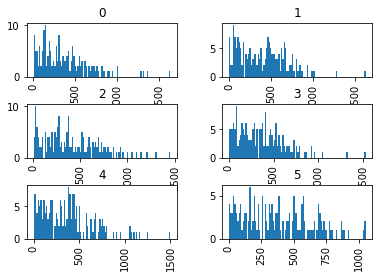

In [95]:
groupsData.hist(column='actionCounts', by='groupeExpe', bins=100)

In [96]:
#Test for difference of medians: non-parametric version of ANOVA:
stats.kruskal(groupsData[groupsData["groupeExpe"]==0]["actionCounts"], groupsData[groupsData["groupeExpe"]==1]["actionCounts"], groupsData[groupsData["groupeExpe"]==2]["actionCounts"], groupsData[groupsData["groupeExpe"]==3]["actionCounts"], groupsData[groupsData["groupeExpe"]==4]["actionCounts"], groupsData[groupsData["groupeExpe"]==5]["actionCounts"])

#1-way ANOVA
#stats.f_oneway(groupsData[groupsData["groupeExpe"]==0]["actionCounts"], groupsData[groupsData["groupeExpe"]==1]["actionCounts"], groupsData[groupsData["groupeExpe"]==2]["actionCounts"], groupsData[groupsData["groupeExpe"]==3]["actionCounts"], groupsData[groupsData["groupeExpe"]==4]["actionCounts"], groupsData[groupsData["groupeExpe"]==5]["actionCounts"])


KruskalResult(statistic=6.091574397993973, pvalue=0.2974100614222445)

#### Conclusion: There is no difference in between the distributions of the total number of actions in between groups.

## Timeseries

In [5]:
logindex=log.set_index("login")
logindex.head(3)

,action_effectué,cible,table_de_la_cible_action,nom_de_lactivité,contexte,date,session,pointeur,dateonly,week
login,,,,,,,,,,
3108639,viewed,course,1P000,NaN,NaN,2018-10-09 12:16:34,1,2010020091102,2018-10-09,41
3108639,viewed,chapter,book_chapters,Modélisation d'une évolution temporelle,Prérequis,2018-10-09 12:57:53,1,2013029092110,2018-10-09,41
3108639,viewed,course_module,quiz,Description d'une évolution temporelle : loi s...,NaN,2018-10-09 12:55:38,1,2013061095100,2018-10-09,41


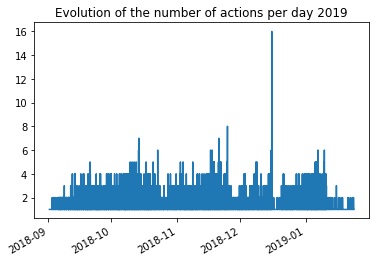

In [109]:
    
mytitle="Evolution of the number of actions per day 2019"
plotseries(logindex, mytitle,"action_effectué")



In [114]:
logindex.index.values[0]

'3108639'

In [6]:
dataGroupsAct=addGroups (logindex, groupsEtu)




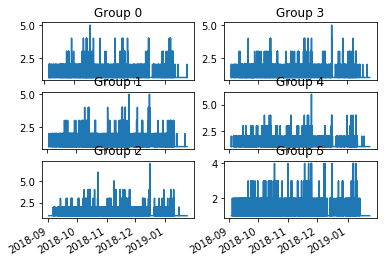

In [128]:
fig, ax=plt.subplots(3,2)
type(ax)
for i in range(0, 6):
    #print(str(i))
    mytitle="Group "+str(i)#+": Evolution of the number of actions per day 2019"    
    plotseriessubplot(dataGroupsAct[dataGroupsAct['groupeExpe']==i], mytitle,"action_effectué", fig, ax[i %3, int(i/3)]) 
    
plt.show()




In [ ]:
fig, ax=plt.subplots(1,1)
color=["blue", "orange", "green", "red","purple","brown"]
#dfCountAll=pd.DataFrame()
for i in range(5,-1, -1):
    
    data=dataGroupsAct[dataGroupsAct['groupeExpe']==i]
    #ax.plot(data.groupby('week').count()['action_effectué'], "o",label="Group"+str(i), alpha=0.7)
    dfCount=data.groupby('week').count()['action_effectué']
    dfCount.plot(kind="bar", color=color[i], label="Group"+str(i), alpha=0.7)
    #dfCount[]
    #dfCountAll["Group"+str(i)]=dfCount
plt.legend(loc='best')
fig.autofmt_xdate()
plt.savefig("actionsGroups"+str(i)+"and0.pdf", dpi=300)
#ax.set_title(mytitle)


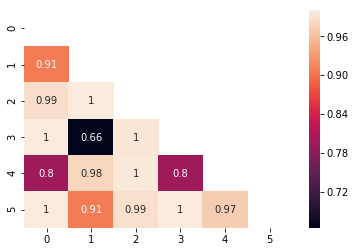

In [22]:
dataGroupsActg=dataGroupsAct.groupby(['week', 'groupeExpe']).count()['action_effectué']
dataGroupsActg=dataGroupsActg.reset_index(1)
testsHeatmap(dataGroupsActg, groupcolname="groupeExpe", variablecolname="action_effectué", mytest="ks_2samp")
#

### Conclusion: No differences in between global weekly activities of groups on Moodle.

## Coupling with grades

### Number of graded quizzes per group 

In [66]:
groupsEtu.index=groupsEtu.index.astype("str")
notes_orig.index=notes_orig.index.astype("str")
notesGroupes=pd.concat([groupsEtu, notes_orig], axis=1, join="inner")
notesGroupes

,groupe,groupeExpe,Prénom,Nom,Numéro d'identification,Adresse de courriel,Test Mécanique du point (Brut),Test Mathématiques pour la Physique (Brut),Total de Test Positionnement (Brut),Test Calcul numérique élémentaire (Brut),...,Contenu interactif Équilibre d'un mobile sur une pente (Brut),Contenu interactif La chute libre : plume et balle (Brut),Contenu interactif Le pendule élastique vertical (Brut),Contenu interactif Construction et utilisation d'un diagramme énergie-position (Brut),Contenu interactif Non conservation de l'énergie mécanique (Brut),Contenu interactif Collisions : équations de base (Brut),Contenu interactif Collisions : exemple et expérience (Brut),Test Collisions entre deux mobiles (Brut),Total du cours (Brut),Dernier téléchargement depuis ce cours
3803673,Grp. TP DC 3S,0,Côme,Gojkovic-Lette,3803673,come.gojkovic-lette@etu.upmc.fr,7.5,4.29,58.93,8.75,...,-,-,-,-,-,-,-,3.83,-,1545145539
3800421,Grp. TP DC 3S,0,Sacha,Martinelle,3800421,sacha.martinelle@etu.upmc.fr,10,4.29,71.43,8.75,...,-,-,-,-,-,-,-,-,-,1545145544
3800446,Grp. TP DC 3S,0,Mathilde,Pareau,3800446,mathilde.pareau@etu.upmc.fr,5.83,2.86,43.45,8.75,...,-,-,-,-,-,-,-,-,-,1545145546
3804785,Grp. TP DC 3S,0,Pierre-Alexandre,Zal,3804785,pierre-alexandre.zal@etu.upmc.fr,10,1.43,57.14,8.75,...,-,-,-,-,-,-,-,-,-,1545145551
3801989,Grp. TP DC 3S,0,Emma,Clair,3801989,emma.clair@etu.upmc.fr,10,10,100,7.5,...,-,-,-,-,-,-,-,0.33,-,1545145535
3801364,Grp. TP DC SHI/SPH,0,Elia,Antonsanti,3801364,elia.antonsanti@etu.upmc.fr,5,5.71,53.57,-,...,-,-,-,-,-,-,-,-,-,1545145532
3804710,Grp. TP DC SHI/SPH,0,Albane,Le Cabec,3804710,albane.le_cabec@etu.upmc.fr,6.67,4.29,54.76,-,...,-,-,-,-,-,-,-,-,-,1545145542
3800049,Grp. TP DC SHI/SPH/IL,0,Corentin,Morin,3800049,corentin.morin@etu.upmc.fr,10,10,100,10,...,-,-,-,-,-,-,-,-,-,1545145545
3801342,Grp. TP DC SHI/SPH/IL,0,Solène,Kinzonzi--Barbarit,3801342,solene.kinzonzi--barbarit@etu.upmc.fr,3.33,7.14,52.38,10,...,-,-,-,-,-,-,-,-,-,1545145542
3804642,Grp. TP DC SHI/SPH/IL,0,Lisa,Quenisset,3804642,lisa.quenisset@etu.upmc.fr,7.5,2.86,51.79,-,...,-,-,-,-,-,-,-,-,-,1545145547


In [458]:
notesGroupesOnly=notesGroupes.drop([ "groupe", "Prénom", "Nom","Numéro d'identification", "Adresse de courriel", "Dernier téléchargement depuis ce cours" , "Total du cours (Brut)"], axis=1,)
#notesGroupesOnly.drop(["Test Mécanique du point (Brut)","Test Mathématiques pour la Physique (Brut)", "Total de Test Positionnement (Brut)",  ], axis=1)
notesGroupesOnly.replace ("-", np.NaN, inplace=True)



In [459]:
notesGroupesOnly=notesGroupesOnly.dropna(axis=1, how="all")
notesGroupesOnly=notesGroupesOnly.drop(['Test\xa0Calcul numérique élémentaire (Brut)', 'Test\xa0Manipulation des multiples et des sous-multiples (Brut)','Test\xa0Valeurs de référence (Brut)','Contenu interactif\xa0Démarche du physicien (Brut)'], axis=1 )

len(notesGroupesOnly.columns)-1#28


30

In [83]:
assert(len(notesGroupesOnly.columns)-1==30)


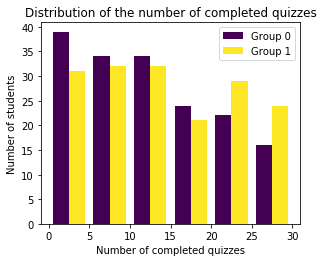

In [429]:
#fig, ax=plt.subplots(1,1)
fig = plt.figure(figsize=(6,4))
ax  = fig.add_subplot(111)

bins = np.linspace(0, 30, 7)

#notesGroupesOnly=notesGroupesOnly.drop(["Test Mécanique du point (Brut)","Test Mathématiques pour la Physique (Brut)","Total de Test Positionnement (Brut)"], axis=1, )

for group in notesGroupesOnly.groupby("groupeExpe"):
    
    if(group[0]==0):
        quiznotecounts=pd.DataFrame(group[1].count(axis=1), columns=["counts"])
        quiznotecounts["group"]=group[0]
        #ax.hist(group[1].count(axis=1), alpha=0.6, label=str(group[0]), stacked=True, density=True, histtype="barstacked")
   
    if (group[0]>=1):# and group[0]<6):
        quiznotecountstemp=pd.DataFrame(group[1].count(axis=1), columns=["counts"])
        quiznotecountstemp["group"]=group[0]
        quiznotecounts=pd.concat([quiznotecounts,quiznotecountstemp], sort=False)
        #ax.hist(group[1].count(axis=1), alpha=0.6, label=str(group[0]), stacked=True, density=True, histtype="barstacked")
#ax.hist([quiznotecounts[quiznotecounts['group']==0]['counts'],quiznotecounts[quiznotecounts['group']==1]['counts'], quiznotecounts[quiznotecounts['group']==2]['counts'],quiznotecounts[quiznotecounts['group']==3]['counts'],quiznotecounts[quiznotecounts['group']==4]['counts'],quiznotecounts[quiznotecounts['group']==5]['counts']] , bins, alpha=0.6,  label=['Group ' + str(s) for s in range(6)] )#density=True)     
ax.hist([quiznotecounts[quiznotecounts['group']==0]['counts'],quiznotecounts[quiznotecounts['group']==1]['counts']], bins, alpha=1,  label=['Group ' + str(s) for s in range(2)])#density=True , color=createcolorlist(6)[0:2])     

#plt.legend (loc=(1.01, 0.58))
plt.title("Distribution of the number of completed quizzes")
plt.ylabel("Number of students")
plt.xlabel("Number of completed quizzes")
#plt.xticks(np.arange(0, 29, step=7))

ax.set_position([0.1,0.15,0.6,0.7])
ax.legend()#( loc = 'upper left', bbox_to_anchor = (1.0, 0.5))

plt.savefig("plots/numquizzesCompletedPergroup01.pdf")
plt.savefig("plots/numquizzesCompletedPergroup01.eps") 
plt.show()

In [378]:
print(quiznotecounts[quiznotecounts['group']==0]['counts'].mean(), quiznotecounts[quiznotecounts['group']==0]['counts'].std(),quiznotecounts[quiznotecounts['group']==1]['counts'].mean(), quiznotecounts[quiznotecounts['group']==1]['counts'].())  

13.29050279329609 9.025834909480361 16.301507537688444 9.946297607637243


In [389]:
stats.ttest_ind(quiznotecounts[quiznotecounts['group']==0]['counts'], quiznotecounts[quiznotecounts['group']==1]['counts'])

Ttest_indResult(statistic=-3.0697756558534053, pvalue=0.002297766995561406)

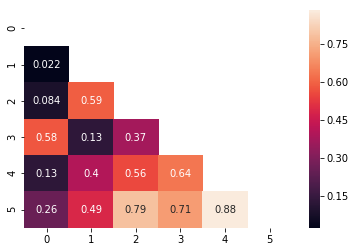

In [29]:
testsHeatmap(quiznotecounts, "group", "counts", "ks_2samp")

#### Conclusion

There is a significant difference in between the medians of number of quizzes performed by groups 1,2 and 4 compared to the control. There is no significant difference for groups 3 and 5. Group 1 has performed the largest number of quizzes.


### Distribution of quizz results 

groupeExpe
0    60.710
1    60.120
2    64.290
3    62.500
4    64.290
5    60.415
Name: Total de Test Positionnement (Brut), dtype: float64
27
mean of quizzes: groupeExpe
0    8.221111
1    8.859074
2    9.127778
3    9.184815
4    8.850926
5    8.740556
dtype: float64
groupeExpe
0    0.135416
1    0.147357
2    0.141978
3    0.146957
4    0.137672
5    0.144675
dtype: float64


Text(0.5, 1.0, 'Sum of medians of quizz scores normalised by initial levels')

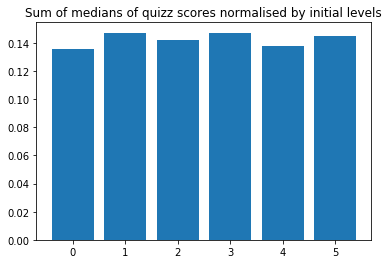

In [30]:
meanNotesGroupesOnly=notesGroupesOnly.groupby("groupeExpe").median()#Compute mean of groups, excluding missing values

#initial level
initLevel=meanNotesGroupesOnly[meanNotesGroupesOnly.columns[2]].groupby("groupeExpe").median()
print(initLevel)
#plt.bar(range(6), initLevel)
#plt.show()


#dropping the preliminary tests to have only the quizzes:
meanNotesGroupesOnlyQuizz=meanNotesGroupesOnly.drop([meanNotesGroupesOnly.columns[0], meanNotesGroupesOnly.columns[1],meanNotesGroupesOnly.columns[2]], axis=1).dropna(axis=1, how='all')
print(len(meanNotesGroupesOnlyQuizz.columns))
meanQuizzes=meanNotesGroupesOnlyQuizz.sum(axis=1)/len(meanNotesGroupesOnlyQuizz.columns)
print( "mean of quizzes:", meanQuizzes)
print( meanQuizzes/initLevel)
#plt.bar(range(6), sumQuizzes)
plt.bar(range(6), meanQuizzes/initLevel)#*50 
plt.title("Sum of medians of quizz scores normalised by initial levels")
#?notesGroupesOnly.mean    
#

27
groupeExpe
0    60.710
1    60.120
2    64.290
3    62.500
4    64.290
5    60.415
Name: Total de Test Positionnement (Brut), dtype: float64


Text(0.5, 1.0, 'Sum of medians of quizz scores normalised by initial levels')

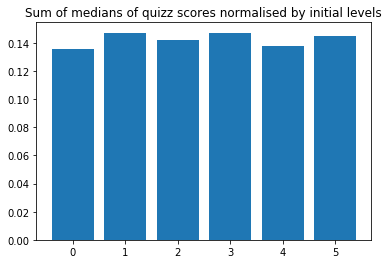

In [31]:
meanNotesGroupesOnly=notesGroupesOnly.groupby("groupeExpe").median()#Compute mean of groups, excluding missing values

#dropping the preliminary tests to have only the quizzes:
meanNotesGroupesOnlyQuizz=meanNotesGroupesOnly.drop([meanNotesGroupesOnly.columns[0], meanNotesGroupesOnly.columns[1],meanNotesGroupesOnly.columns[2]], axis=1).dropna(axis=1, how='all')
print(len(meanNotesGroupesOnlyQuizz.columns))
meanQuizzes=meanNotesGroupesOnlyQuizz.sum(axis=1)/len(meanNotesGroupesOnlyQuizz.columns)

#initial level
initLevel=meanNotesGroupesOnly[meanNotesGroupesOnly.columns[2]].groupby("groupeExpe").median()
print(initLevel)


#print(sumQuizzes, meanQuizzes/initLevel)
#plt.bar(range(6), sumQuizzes)
plt.bar(range(6), meanQuizzes/initLevel)#*50
plt.title("Sum of medians of quizz scores normalised by initial levels")
#?notesGroupesOnly.mean    
#

#### Conclusion

There are no differences in quiz scores in between groups except from a slight decrease for group 4 (to be checked if significant with confidence interval)


### Number of tentatives per quiz? Conclusion: nothing significant. Code takes forever to run.

In [5]:
quizzAttempts=pd.read_csv("/Users/iryna/data_MOCAH/data_SPOC2019/1P000/quiz_attempts.csv", sep="|", index_col=1, header=None)
quizzAttempts.columns=columnNames
quizzAttempts.head(2)


/Users/iryna/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,LineLogID,role,action,target,table,actionIDinTable,actName,context,other,dateTime
1,,,,,,,,,,
barbi,224098,student,started,attempt,quiz_attempts,184,Calcul numérique élémentaire,NaN,N;,2018-08-09 14:39:56
barbi,224098,editingteacher,started,attempt,quiz_attempts,184,Calcul numérique élémentaire,NaN,N;,2018-08-09 14:39:56


In [7]:
quizzAttemptsStud=quizzAttempts[quizzAttempts["role"]=="student"].drop_duplicates()
#quizzAttemptsStud["groupeExpe"]=groupsEtu["groupeExpe"]
groups=quizzAttemptsStud.groupby(["LineLogID", "actName"])#.count()["role"]#.hist(bins=100)



In [ ]:
attemptsPerQuiz=pd.DataFrame(index=quizzAttemptsStud.index.unique())
for group1 in groups:
    #weirdly, the same action appears twice (cf time). So if time identical, I count it only once.
    #print(group1[1])
    attemptsPerQuiz.loc[group1[0][0], group1[0][1]]=len(group1[1])#.groupby("dateTime").count().shape[0]     
    #print (group1[0])
    
attemptsPerQuiz.head()

In [ ]:
attemptsPerQuizGr=pd.concat([attemptsPerQuiz, groupsEtu["groupeExpe"]], join='inner', axis=1)
attemptsPerQuizGr.head()

In [ ]:
attemptsPerQuizGrCount=attemptsPerQuizGr.groupby("groupeExpe").count()

In [ ]:
plt.hist(attemptsPerQuizGrCount, label=np.array(range(6)), bins=6)
plt.legend()
plt.title("Histogram of the number of quiz attempts per quiz for each experimental group")

In [ ]:
quizzAttemptsSubmit=pd.read_csv("/Users/iryna/data_MOCAH/data_SPOC2019/1P000/quiz_attempts_submitted.csv", sep="|", index_col=None, header=None)
quizzAttemptsSubmit.columns=["LineLogID","userID","role","action","target", "table", "actionIDinTable", "actName", "context", "other", "dateTime"]
quizzAttemptsSubmit.head(2)



In [ ]:
'''
quizzAttemptsSubmitStud=quizzAttemptsSubmit[quizzAttemptsSubmit["role"]=="student"].drop_duplicates()
#quizzAttemptsStud["groupeExpe"]=groupsEtu["groupeExpe"]
groupsSub=quizzAttemptsSubmitStud.groupby(["userID","actName"])#.count()["role"]#.hist(bins=100)
subPerQuiz=pd.DataFrame(index=quizzAttemptsSubmitStud.userID.unique())
i=0
for group1 in groupsSub:
    #weirdly, the same action appears twice (cf time). So if time identical, I count it only once.
    if(i==0):
        print(group1[0],"hey", group1[1])
        i=1
    subPerQuiz.loc[group1[0][0], group1[0][1]]=len(group1[1])#.groupby("dateTime").count().shape[0]     
    #print (group1[0])
    


subPerQuiz.to_csv("/Users/iryna/data_MOCAH/data_SPOC2019/1P000/intermedFiles/subPerQuiz.csv")
'''
subPerQuiz=pd.read_csv("/Users/iryna/data_MOCAH/data_SPOC2019/1P000/intermedFiles/subPerQuiz.csv", index_col=0)
subPerQuiz.head()

In [ ]:
subPerQuiz.index.name=groupsEtu.index.name
groupsEtu.index=groupsEtu.index.astype("str")
subPerQuizGr=pd.concat([subPerQuiz, groupsEtu["groupeExpe"]], join="inner", axis=1)
subPerQuizGr.shape


In [ ]:
subPerQuizGrCount=subPerQuizGr.groupby("groupeExpe").count()
plt.hist(subPerQuizGrCount, label=np.array(range(6)), bins=6)
plt.legend()
plt.title("Histogram of the number of quiz submissions per quiz for each experimental group")

In [ ]:
attemptsPerQuiz.loc['3302931']

In [ ]:
quizzAttemptsSubmitStud

### Impact on final grade?

In [26]:
noteFinaleGr=addGroups(noteFinale)

                 Mean         SD
groupeExpe                      
0.0         58.595307  20.217606
1.0         60.044774  19.851820
2.0         60.468619  19.736405
3.0         58.785052  19.448659
4.0         58.903892  21.869838
5.0         59.525943  19.529557


Text(0.5, 1.0, 'Distribution of final scores')

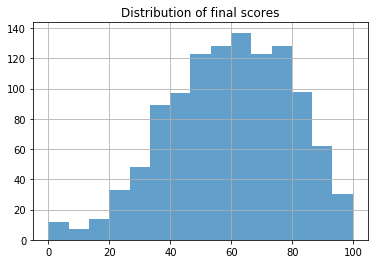

In [56]:
noteFinaleGr.head()
dfinfo=pd.concat([noteFinaleGr[["Total final", "groupeExpe"]].astype("float").groupby("groupeExpe").mean(),
noteFinaleGr[["Total final", "groupeExpe"]].astype("float").groupby("groupeExpe").std()], axis=1)
dfinfo.columns=["Mean", "SD"]
print(dfinfo)
noteFinaleGr["Total final"].astype("float").hist(bins=15, alpha=0.7)
plt.title("Distribution of final scores")

In [57]:

def normalizeByInitLevel(tonormalizecolumndf, initlevelcolumndf):
    assert(len(tonormalizecolumndf.shape)==1)#checking that there is only one column
    assert(len(initlevelcolumndf.shape)==1)#checking that there is only one column
    tonormalizecolumndf.index=tonormalizecolumndf.index.astype("str")
    initlevelcolumndf.index=initlevelcolumndf.index.astype("str")
    res=pd.concat([tonormalizecolumndf,initlevelcolumndf], join='inner', axis=1)
    res.head()

    
    res2=res.dropna()
    res3=res2[res2.iloc[:,1]!=0]
    
    #normalisation: tonormalizecolumndf/ initlevelcolumndf
    return res3.iloc[:,0].astype(float).div(res3.iloc[:,1].astype(float))




In [70]:
tonormalizecolumn="Total final"
noteFinaleGr.replace ("Abs", 0, inplace=True);
noteFinaleGr.replace ("abs", 0, inplace=True);
noteFinaleGr["Total final normalized"]=normalizeByInitLevel(noteFinaleGr["Total final"], notesGroupesOnly["Total de Test Positionnement (Brut)"]);
#notesGroupesOnly.loc['3806886']

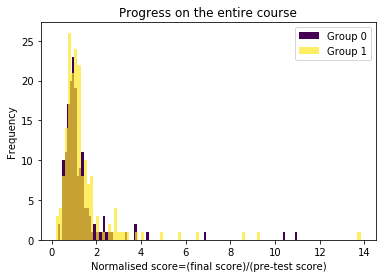

In [425]:
col="Total final normalized"
#noteFinaleGrM=noteFinaleGr[[col,"groupeExpe" ]].astype(float).groupby("groupeExpe").median()
#plt.hist(noteFinaleGrM, label=np.array(range(6)), bins=6)
#plt.legend()
#plt.title("Histogram of the normalized median scores for each experimental group")

def plotkdeByGroupeExpe(noteFinaleGr,colname=col, title=col, plotkind="kde" ):
    fig, ax = plt.subplots()#figsize=(6,4)
    for label, df in noteFinaleGr[[colname,"groupeExpe" ]].astype(float).groupby("groupeExpe"):
        if (label<2):
            if label==0:
                myalpha=1
            if label>0:
                myalpha=0.7    
            if (plotkind=="hist"):
                df[colname].plot(kind=plotkind, ax=ax, label="Group " +str(int(label)), bins=100, alpha=myalpha)#, color= createcolorlist(6)[int(label)]
            if (plotkind=="kde"):
                df[colname].plot(kind="kde", ax=ax, label="Group " +str(int(label)), alpha=myalpha)#, color= createcolorlist(6)[int(label)]
    plt.legend()
    plt.title(title)
    plt.xlabel("Normalised score=(final score)/(pre-test score)")
    
    if plotkind=="kde":
        plt.axis([-2.0, 5.0, 0, 1]) 
    plt.savefig('plots/'+str(col)+plotkind+'.pdf', bbox_inches='tight')
    plt.savefig('plots/'+str(col)+plotkind+'.eps', bbox_inches='tight')
    
    

plotkdeByGroupeExpe(noteFinaleGr, title="Progress on the entire course", plotkind="hist")

In [72]:
#Effect size
print(noteFinaleGr[noteFinaleGr["groupeExpe"]==1]["Total final normalized"].median()/noteFinaleGr[noteFinaleGr["groupeExpe"]==0]["Total final normalized"].median())


1.0872218246682621


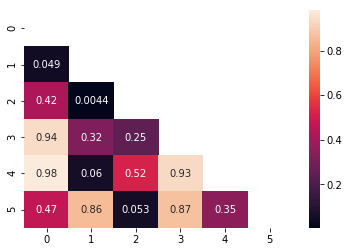

In [73]:
# Est-ce que les différence entre les accroissements de notes sont significatives? 
#Comparaison des distributions:
col="Total final normalized"
noteFinaleGr[[col,"groupeExpe" ]].astype(float)
testsHeatmap(noteFinaleGr[[col,"groupeExpe" ]].astype(float).dropna(), groupcolname="groupeExpe", variablecolname=col, mytest="ks_2samp")

#### Conclusion
There is an impact on the final grade for group 1 with a significance level of 0.05 (pvalue= 0.049). BUT we should add a correction for mutiple testing...

### TODO

integrer taux de reponses a l'auto-evaluation

clusters d'evolutions de participation?

rapport des activités des étudiants 

nombre d'accès par chapitre? entre faibles et forts?


prendre en compte ceux qui deviennent inactifs

Done:wims

!plot 2D nb de quiz vs notes normalisées

!!classer par décile la note de renormalisation et regarder si ça impacte plus une catégorie d'étudiants.


!! utiliser les questionnaires de départ pour mettre des choses en lumière

### -> Classer par la note de renormalisation et regarder si impact plus fort chez une catégorie d'étudiants

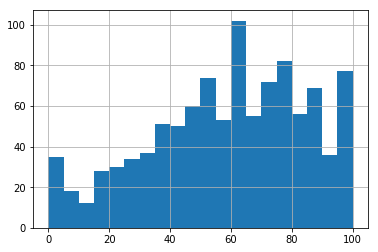

In [74]:
notesGroupesOnly["Total de Test Positionnement (Brut)"].hist(bins=20)

In [75]:
noteFinaleGr.shape
int(noteFinaleGr.shape[0]/2)

564

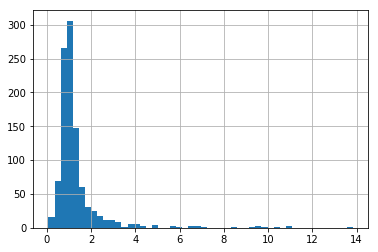

In [76]:
nparties=1
noteFinaleGr.sort_values(by="Total final normalized").head(int(noteFinaleGr.shape[0]/nparties))["Total final normalized"].hist(bins=50)

In [81]:
noteFinaleGrTestInit=pd.concat([noteFinaleGr, notesGroupesOnly["Total de Test Positionnement (Brut)"]], axis=1, sort=False)
#noteFinaleGrTestInit.head()


In [78]:
from scipy.stats.stats import pearsonr
from math import ceil



def corrQuizzCounts(noteFinaleGr, colonne, nparties, groupecolonne="groupeExpe", sortbycolonne="Total de Test Positionnement (Brut)"):
    #this function returns correlation between noteFinaleGr[colonne] and quizz counts (=number of quizzes submitted), this in between nparties of "level" groups. These levels groups are parts of students sorted according to the column sortbycolonne. 
    myres=pd.DataFrame(columns=[colonne])
    
    if(colonne!=sortbycolonne):
        notesAndquizCounts=pd.concat([noteFinaleGr[[colonne, groupecolonne, sortbycolonne]],quiznotecounts['counts']], join='inner', axis=1 )
    else:
        notesAndquizCounts=pd.concat([noteFinaleGr[[groupecolonne, sortbycolonne]],quiznotecounts['counts']], join='inner', axis=1 )
 
    
    taillepartie=notesAndquizCounts.shape[0]/nparties
    #print("notesAndquizCounts.shape[0]: ", notesAndquizCounts.shape[0])
    dfsorted=notesAndquizCounts.sort_values(by=sortbycolonne)
    for part in range(0, nparties):
        #print ("part: ", part)
        begin=dfsorted.index[int(part*taillepartie)]
        #print("begin index: ", begin)
        
        end=dfsorted.index[int((part+1)*taillepartie)-1]
        #print("end index: ", end)
        dfnotes=dfsorted.loc[begin:end,:]
        #y=dfsorted.loc[begin:end,'counts']
        
        
    #notesGroupesOnly
    #noteFinaleGr



    #"Total final normalized"#(0.23092684713496736, 1.6301756900403062e-07) (-0.03035852166916574, 0.49692671547754896)
    #"Total de Test Positionnement (Brut)"#(0.1737279172510225, 7.397984441596493e-05)
    #"Total final"#(0.3055860889781456, 1.1767624210116213e-13) (0.21954636092117477, 1.3535142835429958e-07)


    
        for gr in range(0,6):
            #print(dfnotes.head(3))
            df=dfnotes[dfnotes[groupecolonne]==gr].copy()
            df=df.sort_values(colonne)

           
            df.dropna(inplace=True)
            x=df[colonne]
            y=df['counts']
            myres.loc["Part"+str(part)+"_G"+str(gr)]=pearsonr(x,y)[1]
            #print ("Groupe expérimental "+str(gr)+ ": ", pearsonr(x,y)) #corrélation entre colonne et le nb de quizz faits.  

    return myres





          Total de Test Positionnement (Brut)   Total final  \
Part0_G0                             0.264475  3.881518e-04   
Part0_G1                             0.003114  4.170811e-03   
Part0_G2                             0.025876  3.979968e-03   
Part0_G3                             0.406097  2.901069e-02   
Part0_G4                             0.075919  5.045309e-05   
Part0_G5                             0.030773  2.077631e-07   
Part1_G0                             0.053688  1.087981e-01   
Part1_G1                             0.163249  1.321725e-02   
Part1_G2                             0.381568  1.361258e-02   
Part1_G3                             0.390806  1.175086e-03   
Part1_G4                             0.507359  2.440053e-03   
Part1_G5                             0.439836  1.379227e-01   

          Total final normalized  
Part0_G0                0.644577  
Part0_G1                0.724987  
Part0_G2                0.644282  
Part0_G3                0.688493  
Part0

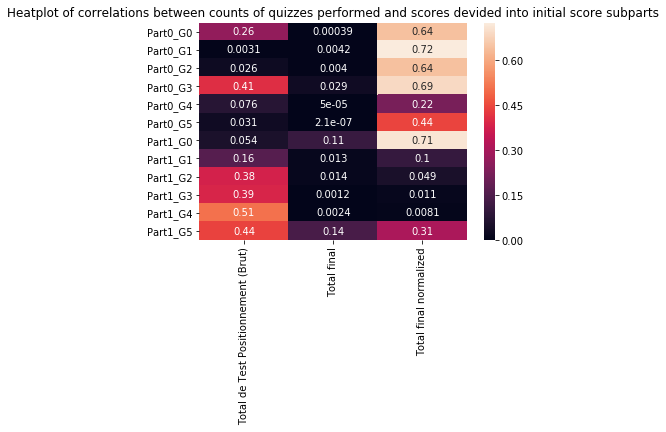

In [85]:
nparties=2

colonne="Total de Test Positionnement (Brut)"
#print("Correlations "+colonne)


myres=corrQuizzCounts(noteFinaleGrTestInit, colonne, nparties, groupecolonne="groupeExpe")

colonne="Total final"
#print("Correlations "+colonne)
myres=pd.concat([myres,corrQuizzCounts(noteFinaleGrTestInit, colonne, nparties, groupecolonne="groupeExpe")], axis=1)


colonne="Total final normalized"
#print("Correlations "+colonne)
myres=pd.concat([myres,corrQuizzCounts(noteFinaleGrTestInit, colonne, nparties, groupecolonne="groupeExpe")], axis=1)


print(myres)
sns.heatmap(myres , annot=True)
plt.title("Heatplot of correlations between counts of quizzes performed and scores devided into initial score subparts")
for mytype in ["svg", "eps", "pdf", "png"]:
    plt.savefig("plots/CorrelationsWQuizzCountsByLevel."+mytype, format=mytype, dpi=300)

          Total de Test Positionnement (Brut)   Total final  \
Part0_G0                             0.264475  3.881518e-04   
Part0_G1                             0.003114  4.170811e-03   
Part0_G2                             0.025876  3.979968e-03   
Part0_G3                             0.406097  2.901069e-02   
Part0_G4                             0.075919  5.045309e-05   
Part0_G5                             0.030773  2.077631e-07   
Part1_G0                             0.053688  1.087981e-01   
Part1_G1                             0.163249  1.321725e-02   
Part1_G2                             0.381568  1.361258e-02   
Part1_G3                             0.390806  1.175086e-03   
Part1_G4                             0.507359  2.440053e-03   
Part1_G5                             0.439836  1.379227e-01   

          Total final normalized  
Part0_G0                0.644577  
Part0_G1                0.724987  
Part0_G2                0.644282  
Part0_G3                0.688493  
Part0

Text(0.5, 1.0, 'Heatplot of correlations between counts of quizzes performed and scores devided into initial score subparts')

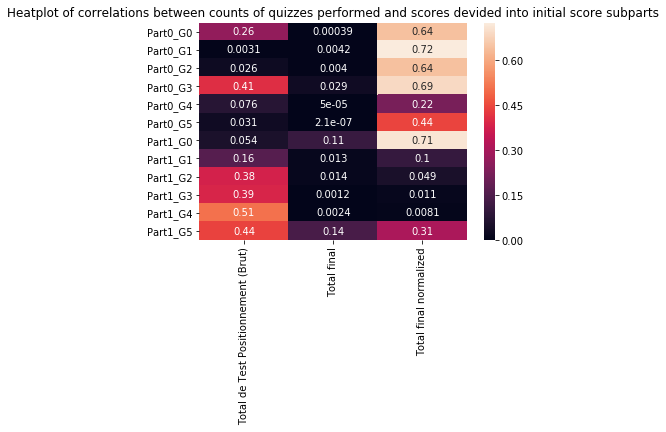

In [86]:
nparties=2

colonne="Total de Test Positionnement (Brut)"
#print("Correlations "+colonne)
myres=corrQuizzCounts(noteFinaleGrTestInit, colonne, nparties, groupecolonne="groupeExpe")

colonne="Total final"
#print("Correlations "+colonne)
myres=pd.concat([myres,corrQuizzCounts(noteFinaleGrTestInit, colonne, nparties, groupecolonne="groupeExpe")], axis=1)


colonne="Total final normalized"
#print("Correlations "+colonne)
myres=pd.concat([myres,corrQuizzCounts(noteFinaleGrTestInit, colonne, nparties, groupecolonne="groupeExpe")], axis=1)


print(myres)
sns.heatmap(myres , annot=True)
plt.title("Heatplot of correlations between counts of quizzes performed and scores devided into initial score subparts")
#for mytype in ["svg", "eps", "pdf", "png"]:
#    plt.savefig("plots/CorrelationsWQuizzCountsByLevel."+mytype, format=mytype, dpi=300)

          Total de Test Positionnement (Brut)  Total final  \
Part0_G0                             0.001080     0.002087   
Part0_G1                             0.148944     0.020984   
Part0_G2                             0.000035     0.000013   
Part0_G3                             0.010097     0.000004   
Part0_G4                             0.061680     0.001428   
Part0_G5                             0.020093     0.009764   
Part1_G0                             0.088628     0.009738   
Part1_G1                             0.007478     0.000811   
Part1_G2                             0.001597     0.002488   
Part1_G3                             0.179922     0.049528   
Part1_G4                             0.157191     0.011596   
Part1_G5                             0.022190     0.000066   

          Total final normalized  
Part0_G0                0.725562  
Part0_G1                0.114474  
Part0_G2                0.298622  
Part0_G3                0.000769  
Part0_G4          

Text(0.5, 1.0, 'Heatplot of correlations between counts of quizzes performed and scores devided into progress subparts')

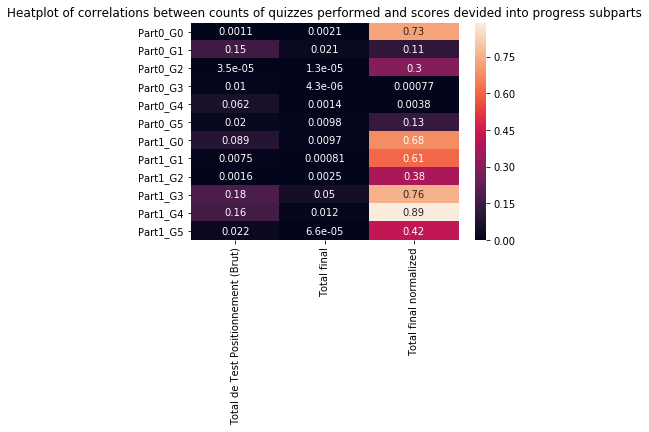

In [87]:
nparties=2

colonne="Total de Test Positionnement (Brut)"
#print("Correlations "+colonne)
myres=corrQuizzCounts(noteFinaleGrTestInit, colonne, nparties, groupecolonne="groupeExpe", sortbycolonne="Total final normalized")

colonne="Total final"
#print("Correlations "+colonne)
myres=pd.concat([myres,corrQuizzCounts(noteFinaleGrTestInit, colonne, nparties, groupecolonne="groupeExpe", sortbycolonne="Total final normalized")], axis=1)


colonne="Total final normalized"
#print("Correlations "+colonne)
myres=pd.concat([myres,corrQuizzCounts(noteFinaleGrTestInit, colonne, nparties, groupecolonne="groupeExpe", sortbycolonne="Total final normalized")], axis=1)


print(myres)
sns.heatmap(myres , annot=True)
plt.title("Heatplot of correlations between counts of quizzes performed and scores devided into progress subparts")

#

In [113]:
"""
nparties=2

colonne="Total de Test Positionnement (Brut)"
#print("Correlations "+colonne)
myres=corrQuizzCounts(noteFinaleGrTestInit, colonne, nparties, groupecolonne="groupeExpe", sortbycolonne="Total final")

colonne="Total final"
#print("Correlations "+colonne)
myres=pd.concat([myres,corrQuizzCounts(noteFinaleGrTestInit, colonne, nparties, groupecolonne="groupeExpe", sortbycolonne="Total final")], axis=1)


colonne="Total final normalized"
#print("Correlations "+colonne)
myres=pd.concat([myres,corrQuizzCounts(noteFinaleGrTestInit, colonne, nparties, groupecolonne="groupeExpe", sortbycolonne="Total final")], axis=1)


print(myres)
sns.heatmap(myres , annot=True)
plt.title("Heatplot of correlations between counts of quizzes performed and scores devided into final score subparts")
"""

'\nnparties=2\n\ncolonne="Total de Test Positionnement (Brut)"\n#print("Correlations "+colonne)\nmyres=corrQuizzCounts(noteFinaleGrTestInit, colonne, nparties, groupecolonne="groupeExpe", sortbycolonne="Total final")\n\ncolonne="Total final"\n#print("Correlations "+colonne)\nmyres=pd.concat([myres,corrQuizzCounts(noteFinaleGrTestInit, colonne, nparties, groupecolonne="groupeExpe", sortbycolonne="Total final")], axis=1)\n\n\ncolonne="Total final normalized"\n#print("Correlations "+colonne)\nmyres=pd.concat([myres,corrQuizzCounts(noteFinaleGrTestInit, colonne, nparties, groupecolonne="groupeExpe", sortbycolonne="Total final")], axis=1)\n\n\nprint(myres)\nsns.heatmap(myres , annot=True)\nplt.title("Heatplot of correlations between counts of quizzes performed and scores devided into final score subparts")\n'

### No clear conclusion. 


### Résultats= Corrélations (à revoir):
colonne=**"Total de Test Positionnement (Brut)**

**moitié avec le moins bon niveau de départ:(0.1737279172510225, 7.397984441596493e-05)**

moitié avec le meilleur niveau de départ:(0.10665509669604802, 0.015359931572676866)


colonne=**"Total final"**

***moitié avec le moins bon résultat final:(0.3055860889781456, 1.1767624210116213e-13)***

**moitié avec le meilleur résultat final:(0.21954636092117477, 1.3535142835429958e-07)**


colonne=**"Total final normalized"**

**moitié avec le moins de progrès: (0.23092684713496736, 1.6301756900403062e-07)**

moitié avec le plus de progrès: (-0.03035852166916574, 0.49692671547754896)


### Conclusion: Chez la moitié la plus faible de la classe, il y a une corrélation entre le nombre de quiz faits et:
- les resultats finaux (total final), 
- le progrès(Total final normalized),
- le niveau initial . 

Chez la meilleure moitié, seulement la corrélation entre les resultats finaux et le nombre de quiz faits demeure (pas de corrélation avec le progrès). 

Est-ce que les quiz aideraient la moitié qui progressait le moins dans la classe? C'est tout à fait possible, ce serait elle qui manquerait le plus de méthode pour travailler régulièrement.  Par ailleurs, l'effet est plus fort pour les groupes expérimentaux 3,4,5  ( mails plus personnalisés) chez cette moitié plus faible (résultats ci-dessus à mettre au propre).  

## Sequences and timing: what has been done when?

#### Exploration of what is in log

In [40]:
log.groupby("cible").count()

,login,action_effectué,table_de_la_cible_action,nom_de_lactivité,contexte,date,session,pointeur,dateonly,week
cible,,,,,,,,,,
attempt,190685,190685,190685,190685,35353,190685,190685,190685,190685,190685
attempt_summary,36737,36737,36737,36737,0,36737,36737,36737,36737,36737
badge_listing,258,258,258,0,0,258,258,258,258,258
chapter,46262,46262,46262,46262,46262,46262,46262,46262,46262,46262
course,65785,65785,65785,0,0,65785,65785,65785,65785,65785
course_module,78154,78154,78154,78154,0,78154,78154,78154,78154,78154
course_user_report,872,872,872,0,0,872,872,872,872,872
grade_report,4715,4715,4715,0,0,4715,4715,4715,4715,4715
recent_activity,95,95,95,0,0,95,95,95,95,95


In [41]:
log.groupby("table_de_la_cible_action").count()


,login,action_effectué,cible,nom_de_lactivité,contexte,date,session,pointeur,dateonly,week
table_de_la_cible_action,,,,,,,,,,
1P000,71727,71727,71727,0,0,71727,71727,71727,71727,71727
book_chapters,46262,46262,46262,46262,46262,46262,46262,46262,46262,46262
hvp,6878,6878,6878,6878,0,6878,6878,6878,6878,6878
quiz,71276,71276,71276,71276,0,71276,71276,71276,71276,71276
quiz_attempts,227422,227422,227422,227422,35353,227422,227422,227422,227422,227422


In [42]:
log.groupby("contexte").count()


,login,action_effectué,cible,table_de_la_cible_action,nom_de_lactivité,date,session,pointeur,dateonly,week
contexte,,,,,,,,,,
Prérequis,2103,2103,2103,2103,2103,2103,2103,2103,2103,2103
-0.33333/8.00000,11,11,11,11,11,11,11,11,11,11
-0.50000/8.00000,5,5,5,5,5,5,5,5,5,5
-1.00000/12.00000,9,9,9,9,9,9,9,9,9,9
-1.00000/7.00000,36,36,36,36,36,36,36,36,36,36
-2.00000/12.00000,3,3,3,3,3,3,3,3,3,3
-2.00000/7.00000,18,18,18,18,18,18,18,18,18,18
-3.00000/12.00000,1,1,1,1,1,1,1,1,1,1
-3.00000/7.00000,10,10,10,10,10,10,10,10,10,10


In [43]:
log[log["contexte"]=="Quiz" ].groupby("action_effectué").count()

,login,cible,table_de_la_cible_action,nom_de_lactivité,contexte,date,session,pointeur,dateonly,week
action_effectué,,,,,,,,,,
viewed,324,324,324,324,324,324,324,324,324,324


In [44]:
log[log["contexte"]=="Quiz sur le cours" ].groupby("action_effectué").count()

,login,cible,table_de_la_cible_action,nom_de_lactivité,contexte,date,session,pointeur,dateonly,week
action_effectué,,,,,,,,,,
viewed,2087,2087,2087,2087,2087,2087,2087,2087,2087,2087


In [45]:
log[log['cible']=="attempt"].shape

(190685, 11)

In [46]:
log[log['table_de_la_cible_action']=="quiz"].groupby("action_effectué").count()

,login,cible,table_de_la_cible_action,nom_de_lactivité,contexte,date,session,pointeur,dateonly,week
action_effectué,,,,,,,,,,
viewed,71276,71276,71276,71276,0,71276,71276,71276,71276,71276


In [47]:
log[log['table_de_la_cible_action']=="quiz_attempts"].groupby("action_effectué").count()

,login,cible,table_de_la_cible_action,nom_de_lactivité,contexte,date,session,pointeur,dateonly,week
action_effectué,,,,,,,,,,
reviewed,38187,38187,38187,38187,0,38187,38187,38187,38187,38187
started,36458,36458,36458,36458,0,36458,36458,36458,36458,36458
submitted,35353,35353,35353,35353,35353,35353,35353,35353,35353,35353
viewed,117424,117424,117424,117424,0,117424,117424,117424,117424,117424


In [48]:
log[log['table_de_la_cible_action']=="quiz_attempts"].groupby("cible").count()

,login,action_effectué,table_de_la_cible_action,nom_de_lactivité,contexte,date,session,pointeur,dateonly,week
cible,,,,,,,,,,
attempt,190685,190685,190685,190685,35353,190685,190685,190685,190685,190685
attempt_summary,36737,36737,36737,36737,0,36737,36737,36737,36737,36737


 Conclusion: les essais de quiz sont les seuls qui sont identifiés par le cible "attempt" (et sont dans la table quiz_attempts)

In [49]:
log[log['cible']=="attempt"].groupby(["login","dateonly","nom_de_lactivité", "action_effectué"]).count()

cible  \
login   dateonly   nom_de_lactivité                                   action_effectué          
3108639 2018-10-09 Description d'une évolution temporelle : loi ex... started              1   
                                                                      viewed               2   
                   Description d'une évolution temporelle : loi li... started              1   
                                                                      viewed               2   
        2018-10-11 Calcul numérique élémentaire                       started              1   
                                                                      viewed               1   
3301172 2018-10-08 Mathématiques pour la Physique                     reviewed             1   
                                                                      started              1   
                                                                      submitted            1   
                                                                      viewed               1   
                   Mécanique du point                                 reviewed             1   
                                                                      started              1   
                                                                      submitted            1   
                                                                      viewed               3   
        2018-10-09 Calcul numérique élémentaire                       reviewed             2   
                                                                      started              2   
                                                                      submitted            2   
                                                                      viewed               4   
3302931 2018-09-21 Mathématiques pour la Physique                     reviewed             1   
                                                                      started              1   
                                                                      submitted            1   
                                                                      viewed               1   
                   Mécanique du point                                 reviewed             1   
                                                                      started              1   
                                                                      submitted            1   
                                                                      viewed               6   
        2018-11-19 Calcul numérique élémentaire                       reviewed             2   
                                                                      started              1   
                                                                      submitted            1   
                                                                      viewed               2   
...                                                                                      ...   
3875321 2018-12-15 Puissance et énergie                               reviewed             2   
                                                                      started              2   
                                                                      submitted            2   
                                                                      viewed               4   
3876020 2018-10-14 Analyse dimensionnelle                             started              1   
                                                                      viewed               1   
                   Dimensions et unités                               reviewed             1   
                                                                      started              1   
                                                                      submitted            1   
                                                       

#### Action

In [473]:
logsubmitted=log.loc[(log['action_effectué']=="submitted")].sort_values(by='date')

In [90]:
logsubmittedcount=logsubmitted.groupby("dateonly").count()#.plot(kind="bar")

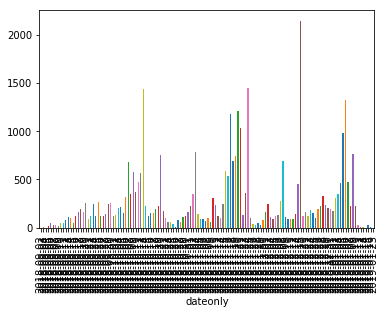

In [92]:
#df.loc[(df['column_name'] == A) & (df['column_name'] == B)]
"""
import matplotlib.dates as mdates
fig, ax = plt.subplots(1,1)
ax.bar(logsubmittedcount["cible"], bins=50, color='lightblue')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_minor_locator(mdates.DayLocator())
#monthFmt = mdates.DateFormatter('%b')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.%y'))
plt.show()

"""


logsubmittedcount["cible"].plot(kind="bar")


In [474]:
logsubmitted.login=logsubmitted.login.astype(str)
logsubmittedg=logsubmitted.merge(groupsEtu, left_on="login", right_index=True )

In [419]:
colorsfinal=[colors[0],colors[5],colors[4],colors[3],colors[2],colors[1]] 
colorsfinal

[array([0.267004, 0.004874, 0.329415, 1.      ]),
 array([0.993248, 0.906157, 0.143936, 1.      ]),
 array([0.477504, 0.821444, 0.318195, 1.      ]),
 array([0.134692, 0.658636, 0.517649, 1.      ]),
 array([0.163625, 0.471133, 0.558148, 1.      ]),
 array([0.253935, 0.265254, 0.529983, 1.      ])]

170
189
176
184
191
168


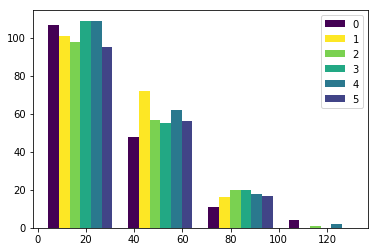

In [420]:
colors=plt.cm.viridis(np.linspace(0,1,6))# jet, inferno, viridis, Spectral
colorsfinal=[colors[0],colors[5],colors[4],colors[3],colors[2],colors[1]] 

mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=colorsfinal) 
#distribution of number of submissions per person in each group:
toplot=[]
forlegend=[str(item) for item in list(range(6))]
for i in range (6):
    toplot.append(logsubmittedg[logsubmittedg["groupeExpe"]==i]["login"].value_counts())
    print(len(logsubmittedg[logsubmittedg["groupeExpe"]==i]["login"].value_counts()))
plt.hist(toplot, label=forlegend, bins=4)#color= createcolorlist(6)
plt.legend()

In [475]:
for i in range(0,5):
    logsubmittedg["week"].replace(i,i+52, inplace=True)
    
    
for i in range(0,57):
    logsubmittedg["week"].replace(i,i-35, inplace=True)
        

In [476]:
logsubmittedg=logsubmittedg[logsubmittedg["nom_de_lactivité"]!="Mécanique du point"]
logsubmittedg=logsubmittedg[logsubmittedg["nom_de_lactivité"]!="Mathématiques pour la Physique"]

#logsubmittedgnoinit.groupby("nom_de_lactivité").count().sort_values(by="login")

0 179
1 199
2 181
3 193
4 203
5 175


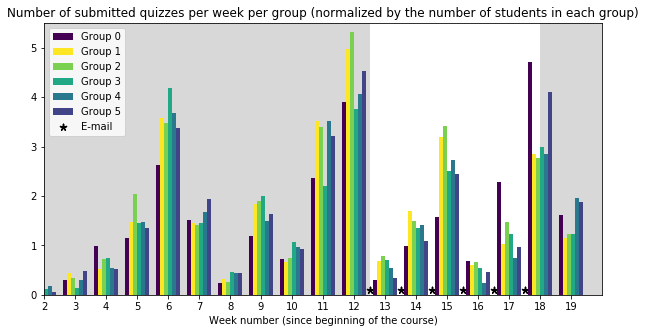

In [479]:
import matplotlib.collections as collections
from matplotlib.collections import EventCollection
from matplotlib.lines import Line2D
#normalized distribution of the number of submissions per week:

minbin=min(logsubmittedg["week"])
maxbin=max(logsubmittedg["week"])
bins=np.arange(minbin,maxbin)-0.5
myweights=[]
numStudentsperGroup=groupsEtu.groupby("groupeExpe").count()
for i in range(6):
    
    x=int(numStudentsperGroup.loc[i])#len(logsubmittedg[logsubmittedg["groupeExpe"]==i]["login"].value_counts())
    x_w = np.empty(len(logsubmittedg[logsubmittedg["groupeExpe"]==i]["week"]))
    x_w.fill(1/x)
    print(i, x)
    myweights.append(x_w)
    
    
    
myweights


fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)


#background
xrange1 = [(minbin, 10.5)]
yrange = (0, 5.5)
xrange2 = [(minbin+16, 4)]
c1 = collections.BrokenBarHCollection(xrange1, yrange, facecolor='grey', alpha=0.3)
c2 = collections.BrokenBarHCollection(xrange2, yrange, facecolor='grey', alpha=0.3)
ax.add_collection(c1)
ax.add_collection(c2)


#plot
ax.hist([logsubmittedg[logsubmittedg["groupeExpe"]==0]["week"],
          logsubmittedg[logsubmittedg["groupeExpe"]==1]["week"],
          logsubmittedg[logsubmittedg["groupeExpe"]==2]["week"],
          logsubmittedg[logsubmittedg["groupeExpe"]==3]["week"],
          logsubmittedg[logsubmittedg["groupeExpe"]==4]["week"],
          logsubmittedg[logsubmittedg["groupeExpe"]==5]["week"]],
          alpha=1, bins=bins, weights=myweights,
          
         label=["Group 0","Group 1","Group 2","Group 3","Group 4","Group 5"]);#color=createcolorlist(6),






#envoi de mails
mails=np.arange(minbin+11, minbin+17)-0.5
#xevents1 = EventCollection(mails, color='black', linelength=0.5, linewidth=5)
#ax.add_collection(xevents1)
plt.scatter(mails,np.ones(len(mails))-0.9, marker=(5, 2), color="black", s=40, label="E-mail")

plt.xlim(minbin,maxbin-1)
plt.ylim(0,5.5)
plt.xlabel("Week number (since beginning of the course)")
plt.legend()
plt.xticks(range(minbin,maxbin-1))
plt.title("Number of submitted quizzes per week per group (normalized by the number of students in each group)")




for mytype in ["svg", "eps", "pdf", "png"]:
    plt.savefig("plots/QuizzPerWeek."+mytype, format=mytype, dpi=300)

In [456]:
logsubmittedg[logsubmittedg["week"]==6]
#logsubmittedgexpe[logsubmittedgexpe["groupeExpe"]==1]#.groupby("week").count()
#(690+701*11+989*12+136*13+336*14+634*15)/(69+701+989+136+336+634)

,login,action_effectué,cible,table_de_la_cible_action,nom_de_lactivité,contexte,date,session,pointeur,dateonly,week,groupe,groupeExpe
34173,3701404,submitted,attempt,quiz_attempts,Valeurs de référence,3.00000/4.00000,2018-10-09 13:35:41,2496,7011080096158,2018-10-09,6,Grp. TP MIPI-G13.4B,1
34174,3701404,submitted,attempt,quiz_attempts,Valeurs de référence,4.00000/4.00000,2018-10-09 13:36:16,2496,7011080096160,2018-10-09,6,Grp. TP MIPI-G13.4B,1
34169,3701404,submitted,attempt,quiz_attempts,Mesures en physique,4.50000/8.00000,2018-10-09 13:42:28,2496,7011075096156,2018-10-09,6,Grp. TP MIPI-G13.4B,1
34188,3701404,submitted,attempt,quiz_attempts,Mesures en physique,7.00000/8.00000,2018-10-09 13:45:30,2496,7011075096159,2018-10-09,6,Grp. TP MIPI-G13.4B,1
34184,3701404,submitted,attempt,quiz_attempts,Mesures en physique,8.00000/8.00000,2018-10-09 13:47:11,2496,7011075096160,2018-10-09,6,Grp. TP MIPI-G13.4B,1
34170,3701404,submitted,attempt,quiz_attempts,Dimensions et unités,9.50000/12.00000,2018-10-09 13:52:45,2496,7012065096158,2018-10-09,6,Grp. TP MIPI-G13.4B,1
39297,3702121,submitted,attempt,quiz_attempts,Calcul numérique élémentaire,2.00000/4.00000,2018-10-13 20:54:56,3010,7011053096155,2018-10-13,6,Grp. TP MIPI-G15.2B,4
39294,3702121,submitted,attempt,quiz_attempts,Manipulation des multiples et des sous-multiples,2.00000/4.00000,2018-10-13 21:01:13,3010,7011073096155,2018-10-13,6,Grp. TP MIPI-G15.2B,4
39295,3702121,submitted,attempt,quiz_attempts,Valeurs de référence,2.00000/4.00000,2018-10-13 21:03:54,3010,7011080096155,2018-10-13,6,Grp. TP MIPI-G15.2B,4
39296,3702121,submitted,attempt,quiz_attempts,Vocabulaire de la physique,3.50000/6.00000,2018-10-13 21:08:50,3010,7011081096156,2018-10-13,6,Grp. TP MIPI-G15.2B,4


In [431]:
print(logsubmittedgexpe[logsubmittedgexpe["groupeExpe"]==0]["week"].mean(),
          logsubmittedgexpe[logsubmittedgexpe["groupeExpe"]==1]["week"].mean(),
          logsubmittedgexpe[logsubmittedgexpe["groupeExpe"]==2]["week"].mean(),
          logsubmittedgexpe[logsubmittedgexpe["groupeExpe"]==3]["week"].mean(),
          logsubmittedgexpe[logsubmittedgexpe["groupeExpe"]==4]["week"].mean(),
          logsubmittedgexpe[logsubmittedgexpe["groupeExpe"]==5]["week"].mean(),
      "\n",
      logsubmittedgexpe[logsubmittedgexpe["groupeExpe"]==0]["week"].std(),
          logsubmittedgexpe[logsubmittedgexpe["groupeExpe"]==1]["week"].std(),
          logsubmittedgexpe[logsubmittedgexpe["groupeExpe"]==2]["week"].std(),
          logsubmittedgexpe[logsubmittedgexpe["groupeExpe"]==3]["week"].std(),
          logsubmittedgexpe[logsubmittedgexpe["groupeExpe"]==4]["week"].std(),
          logsubmittedgexpe[logsubmittedgexpe["groupeExpe"]==5]["week"].std())

12.398830409356725 12.65305410122164 12.663561847988078 12.685861423220974 12.547701815372731 12.424256505576208 
 1.4816998882028087 1.5567854468708173 1.5614146739727266 1.5842037894037653 1.5932332307088208 1.5723159681428103


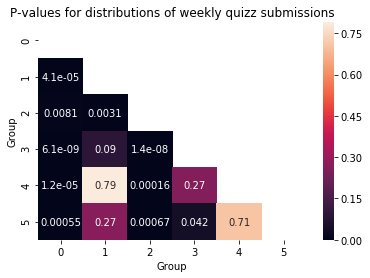

In [392]:
# Comparing statistically the distributions above 
#(of the Number of submitted quizzes per group (normalized by the number of students in each group)).

testsHeatmap(logsubmittedgBexpe, groupcolname="groupeExpe", variablecolname="week", mytest="ks_2samp")
plt.xlabel("Group")
plt.ylabel("Group")
plt.title("P-values for distributions of weekly quizz submissions")
for mytype in ["svg", "eps", "pdf", "png"]:
    plt.savefig("plots/QuizzPerWeekPvals."+mytype, format=mytype, dpi=300)


#### Major conclusion: the quiz weekly completion patterns are significantly different in between the different groups (except from groups 1 and 2). We can also estimate the effect of the experiment if we want. Not done here.

## Effect of initial motivation

In [59]:
initq=pd.read_excel("/Users/iryna/code_MOCAH/SPOCmails/data/Questionnaire préliminaire (réponses) clean.xlsx", index_col=2 )

In [60]:
columnNamesInitq=["date", "nomPrenom", "interetCours", "objectifNoteQuiz","objectifDeVosEtudes", "freqTravailUE","dureeTravailUE", "adresseAlternative", "age", "heuresTravailHebdoHorsEtudes",  "enfants", "etudesSupParents", "jourMail", "avisAideMail", "objectifNoteWims", "objectifNoteUE", "partageEnseignants"]
initq.index.name="numEtudiant"
initq.columns=columnNamesInitq

In [61]:
initq.index=initq.index.astype("str")
initqg=pd.concat([initq,groupsEtu], join="inner", axis=1)

In [62]:
initqg.head(3)

,date,nomPrenom,interetCours,objectifNoteQuiz,objectifDeVosEtudes,freqTravailUE,dureeTravailUE,adresseAlternative,age,heuresTravailHebdoHorsEtudes,enfants,etudesSupParents,jourMail,avisAideMail,objectifNoteWims,objectifNoteUE,partageEnseignants,groupe,groupeExpe
numEtudiant,,,,,,,,,,,,,,,,,,,
3800453,2018-10-23 16:12:03.626,VASSEUR lilian,4,10/10 (Recommandé),Finir haut classe à la fin des trois premier s...,Une fois par semaine (recommandé),2 heures,NaN,18,8,0,"Oui, les deux",Mardi,Ça dépend du contenu du mail,75% (Recommandé),16-18/20,Non,Grp. TP MIPI-G11.3B,3
3800612,2018-10-23 16:16:50.108,POLVORA Thomas,3,10/10 (Recommandé),Avoir un master (ou diplôme équivalent. Exempl...,Une fois par semaine (recommandé),> 2 heures,NaN,17,0,0,"Oui, les deux",Vendredi,Ça dépend du contenu du mail,75% (Recommandé),18-20/20,Oui,Grp. TP MIPI-G11.2B,2
3706400,2018-10-23 16:17:01.502,Simon Antoine,3,9/10,Avoir un master (ou diplôme équivalent. Exempl...,Une fois par semaine (recommandé),45 minutes,NaN,19,0,0,Non,Vendredi,Oui,75% (Recommandé),18-20/20,Non,Grp. TP PCGI-G11.3A,0


In [63]:
initqg.groupby("groupeExpe").count()

,date,nomPrenom,interetCours,objectifNoteQuiz,objectifDeVosEtudes,freqTravailUE,dureeTravailUE,adresseAlternative,age,heuresTravailHebdoHorsEtudes,enfants,etudesSupParents,jourMail,avisAideMail,objectifNoteWims,objectifNoteUE,partageEnseignants,groupe
groupeExpe,,,,,,,,,,,,,,,,,,
0,92,92,92,92,91,92,91,25,92,92,88,91,92,92,92,92,92,92
1,119,119,119,119,119,119,118,27,119,119,112,118,119,119,119,119,119,119
2,122,122,122,122,121,122,122,29,122,122,116,122,122,122,122,122,122,122
3,109,109,109,109,109,109,109,33,109,109,99,108,109,109,109,109,109,109
4,107,107,107,107,106,107,106,32,107,107,99,105,107,107,107,107,107,107
5,108,108,108,108,108,108,108,32,108,108,104,107,108,108,108,108,108,108


In [64]:
## correlation entre avis si le mail va aider et le régularité/nb de quizz faits.
noteFinaleGr[["Total final", "groupeExpe", "Total final normalized"]].head(1)

,Total final,groupeExpe,Total final normalized
3803619,61.75,0,0.89428


In [97]:
logsubmittedg.head(3)
#number of quizzes submitted per person per week

for group in logsubmittedg.groupby(["login", "week"]):
    print(group[0],len(group[1]["nom_de_lactivité"]))#.drop_duplicates()

('3302931', 47) 22
('3302931', 49) 2
('3407984', 47) 34
('3407984', 49) 5
('3407984', 50) 27
('3410530', 47) 11
('3413097', 46) 20
('3413097', 47) 8
('3413097', 48) 2
('3413097', 50) 10
('3416654', 46) 3
('3416654', 47) 10
('3522810', 49) 1
('3670398', 47) 4
('3670398', 49) 1
('3670550', 45) 1
('3670550', 46) 11
('3671108', 46) 39
('3671108', 47) 6
('3671252', 46) 5
('3671252', 47) 12
('3671252', 49) 2
('3671742', 46) 2
('3671742', 48) 3
('3671808', 47) 12
('3671808', 49) 4
('3671808', 50) 18
('3671833', 47) 39
('3671833', 49) 6
('3671833', 50) 11
('3671840', 46) 4
('3671840', 47) 8
('3672079', 48) 5
('3672079', 49) 9
('3672079', 50) 7
('3672573', 46) 7
('3672573', 47) 11
('3672573', 49) 4
('3672573', 50) 22
('3672617', 50) 7
('3673251', 46) 4
('3673251', 47) 34
('3673251', 49) 5
('3681609', 46) 5
('3700046', 47) 3
('3700085', 46) 1
('3700119', 47) 13
('3700129', 45) 1
('3700129', 46) 8
('3700129', 47) 2
('3700131', 46) 22
('3700131', 47) 8
('3700195', 47) 23
('3700196', 45) 3
('370019

('3800210', 49) 1
('3800218', 46) 7
('3800218', 47) 12
('3800218', 49) 5
('3800218', 50) 2
('3800220', 48) 1
('3800225', 47) 9
('3800229', 46) 1
('3800232', 46) 11
('3800232', 47) 3
('3800232', 49) 4
('3800232', 50) 8
('3800233', 47) 5
('3800233', 49) 4
('3800237', 46) 2
('3800237', 47) 4
('3800237', 48) 2
('3800237', 50) 2
('3800238', 45) 4
('3800238', 46) 2
('3800238', 50) 8
('3800241', 47) 11
('3800241', 49) 4
('3800242', 45) 2
('3800242', 46) 1
('3800242', 47) 5
('3800242', 49) 3
('3800242', 50) 3
('3800245', 47) 11
('3800245', 50) 15
('3800246', 46) 4
('3800247', 45) 2
('3800247', 46) 2
('3800247', 47) 4
('3800247', 49) 2
('3800247', 50) 2
('3800251', 45) 4
('3800251', 46) 9
('3800251', 47) 1
('3800252', 45) 6
('3800253', 46) 25
('3800253', 47) 2
('3800253', 48) 4
('3800253', 49) 9
('3800264', 46) 3
('3800264', 47) 5
('3800264', 49) 2
('3800271', 46) 11
('3800271', 50) 9
('3800272', 45) 1
('3800272', 46) 13
('3800272', 47) 2
('3800272', 49) 3
('3800272', 50) 11
('3800273', 47) 2
(

('3801962', 47) 9
('3801989', 45) 3
('3801989', 47) 5
('3801989', 50) 8
('3801993', 46) 20
('3801993', 48) 2
('3801993', 49) 2
('3801996', 46) 3
('3802000', 46) 12
('3802000', 48) 2
('3802000', 49) 1
('3802000', 50) 9
('3802008', 46) 8
('3802008', 47) 6
('3802008', 49) 4
('3802008', 50) 14
('3802009', 45) 2
('3802009', 46) 20
('3802009', 48) 10
('3802009', 49) 5
('3802009', 50) 10
('3802015', 46) 2
('3802019', 45) 5
('3802019', 47) 12
('3802019', 49) 6
('3802019', 50) 12
('3802048', 47) 7
('3802048', 49) 4
('3802072', 47) 11
('3802079', 46) 6
('3802084', 46) 6
('3802084', 47) 15
('3802084', 48) 4
('3802084', 50) 13
('3802090', 47) 14
('3802090', 49) 8
('3802106', 46) 3
('3802106', 47) 8
('3802106', 49) 4
('3802106', 50) 9
('3802108', 47) 4
('3802115', 47) 26
('3802115', 49) 2
('3802115', 50) 16
('3802117', 48) 4
('3802119', 50) 8
('3802125', 46) 3
('3802125', 47) 8
('3802125', 49) 2
('3802125', 50) 4
('3802128', 46) 38
('3802128', 49) 4
('3802135', 46) 4
('3802135', 47) 3
('3802135', 4

('3804313', 47) 17
('3804313', 48) 5
('3804325', 46) 5
('3804333', 47) 11
('3804336', 47) 19
('3804340', 47) 1
('3804372', 46) 4
('3804372', 47) 10
('3804384', 47) 4
('3804384', 49) 1
('3804400', 48) 10
('3804406', 46) 3
('3804406', 47) 11
('3804406', 49) 7
('3804406', 50) 1
('3804418', 46) 2
('3804418', 47) 5
('3804418', 49) 2
('3804418', 50) 8
('3804441', 46) 3
('3804447', 47) 6
('3804447', 49) 2
('3804468', 48) 3
('3804488', 46) 2
('3804488', 50) 1
('3804493', 47) 8
('3804493', 49) 5
('3804511', 46) 1
('3804511', 47) 11
('3804527', 46) 8
('3804527', 47) 4
('3804527', 49) 2
('3804538', 48) 1
('3804538', 49) 7
('3804549', 47) 8
('3804552', 46) 2
('3804552', 47) 15
('3804567', 45) 5
('3804567', 46) 10
('3804567', 47) 6
('3804567', 48) 4
('3804567', 49) 3
('3804574', 47) 15
('3804574', 49) 2
('3804589', 47) 12
('3804596', 46) 8
('3804596', 47) 32
('3804596', 48) 8
('3804596', 50) 15
('3804597', 46) 4
('3804597', 47) 7
('3804597', 49) 2
('3804597', 50) 8
('3804607', 46) 6
('3804607', 47)

In [391]:
# to only get submissions within a certain threshld of time:

from datetime import date

#logsubmittedgbeforrrevisions=logsubmittedgsort[logsubmittedgsort["dateonly"]<date(2018, 12, 20)]
logsubmittedgexpe=logsubmittedg[logsubmittedg["dateonly"]<date(2018, 12, 20)]# &
logsubmittedgexpe=logsubmittedgexpe[logsubmittedgexpe["dateonly"]>date(2018, 11, 9)]

#before expe
logsubmittedgBexpe=logsubmittedg[logsubmittedg["dateonly"]<date(2018, 11, 9)]



In [237]:
logsubmittedgexpe.head(1)



,login,action_effectué,cible,table_de_la_cible_action,nom_de_lactivité,contexte,date,session,pointeur,dateonly,week,groupe,groupeExpe
34469,3701404,submitted,attempt,quiz_attempts,Position - vitesse -accélération,5.50000/10.00000,2018-11-18 02:07:00,2523,7014077096156,2018-11-18,46,Grp. TP MIPI-G13.4B,1


In [261]:
import matplotlib as mpl
import matplotlib.pyplot as plt


In [274]:
colors=plt.cm.Set1(np.linspace(0,1,9))#Dark2
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=colors)